<h3 style = "text-align: center; color:blue"> ISAT 341: Machine Learning and Data Science </h3>

<h3 style = "text-align: center; color:green"> Project: Machine Learning Confidential Sensor Data </h3>

<img src = "images/machine_learning.jpg" width=200; height=250; align= center>

<h3 style = "text-align: center; color:red"> Working with <em>real-world</em> datasets </h3>

### Objectives

To demonstrate the ability to complete an end-to-end data science / machine learning project using real-world data by following and
implementing the main machine learning checklist steps that lead to a solution, namely:
* Frame the problem and look at the big picture.
* Get the data.
* Explore the data to gain insights.
* Prepare the data to expose the underlying data patterns to Machine Learning algorithms.
* Explore many different models and short-list the best ones.
* Fine-tune your models and combine them into a great solution.
* Present your solution.
* Launch, monitor, and maintain your system

<h3 style = "text-align: left; color:purple"> Frame the Problem </h3>

<img src = "images/sensor_array.jpg" width=200; height=250; align= center>

### Sensor Data

The data source as well as the exact nature of the data is confidential. Each data instance contains 12 real-valued input attributes. Each input
attribute represents a sensor designed to detect the presence of one of two groups of substances. As an alternative, the sensor readings may
represent a 'false alarm'.
* Substance 1 is represented by the value 'one' in the class attribute column.
* Substance 2 is represented by the value 'two' in the class attribute column.
* A false alarm is represented by the value 'three' in the class attribute column.

The problem is framed as a **supervised learning** problem: Predict the class of a substance from sensor data using the given measurements in the dataset.

<h3 style = "text-align: Center; color:purple"> Project Analysis Starts Here! </h3>


In [1]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

<h3 style = "text-align: left; color:green"> Exploratory Data Analysis </h3>

### 1) TO DO: Use Pandas to load your data into a dataframe

In [2]:
df = pd.read_csv('Data/Sensor_Data_Confidential_341Project_DataSet5.csv')
df.head(10)

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,1.473,2.311,3.179,2.666,0.27950,0.27710,0.22340,0.18550,0.2539,1.138,1.1110,4.712,one
1,1.460,2.377,3.214,2.920,0.25270,0.30640,0.02563,0.19650,0.3027,1.213,1.0270,5.463,one
2,1.552,2.164,3.064,2.745,0.28200,0.21000,0.17210,0.19290,0.2100,1.221,1.0580,5.332,one
3,1.605,2.228,3.149,2.834,0.29170,0.36130,0.20870,0.12940,0.2734,1.144,1.0620,4.829,one
4,1.534,2.114,3.309,2.976,0.21000,0.25020,0.22580,0.17700,0.2039,1.254,1.1120,5.734,one
5,1.796,2.262,3.180,2.888,0.29660,0.14770,0.16240,0.28200,-9999.0000,1.172,1.0300,4.861,one
6,1.566,2.323,3.469,2.711,0.24170,0.05371,0.21120,-0.02686,0.2197,1.158,0.9924,4.780,one
7,1.425,2.152,3.287,2.781,0.29910,0.20750,0.10380,0.11470,0.2698,1.271,1.1150,5.662,one
8,1.595,2.271,3.323,2.743,0.17330,0.19650,0.16850,0.05859,0.2051,1.290,1.0330,5.145,one
9,1.628,2.211,3.176,2.710,0.08423,0.18920,0.27830,0.16850,0.3491,1.155,1.0080,5.613,one


### 2) TO DO: Describe the data

In [3]:
df.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,-102.944836,-109.711795,-111.319884,-67.994856,-124.949039,-105.066162,-81.658039,-125.587986,-100.835192,-74.740051,-85.312925,-78.599944
std,1027.427211,1050.057089,1072.729741,849.911071,1115.540299,1027.206775,903.995215,1115.467928,1003.772889,877.403031,930.088695,904.281076
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,3.058500,0.817600,4.848250,3.998250,0.462600,0.649400,0.308800,0.188000,0.423600,1.379000,1.089000,0.789800
50%,4.082000,1.353000,5.336000,5.041000,0.806300,1.634500,0.565200,0.302700,0.694600,1.996000,1.285500,4.915000
75%,4.504000,2.354250,5.591250,5.642750,1.400750,2.159000,0.959800,0.491900,1.234250,4.974000,1.865250,5.403000
max,5.105000,4.675000,5.944000,6.013000,2.754000,3.638000,2.446000,1.199000,2.561000,5.312000,5.640000,20.000000


### 3) TO DO: Display the shape of the data

In [4]:
df.shape

(2064, 13)

### 4) TO DO: Drop the data

In [5]:
#First replace any value of -9999 to numpy's, nan type. 
df = df.replace(-9999, np.nan)
df.dropna(inplace = True)

In [6]:
#shape of data in dataframe after cleansing
df.shape

(1826, 13)

### 5) TO DO: Use pandas correlation method to find the two features (inputs) with the highest correlation

In [7]:
df.corr

<bound method DataFrame.corr of       Input 1  Input 2  Input 3  Input 4  Input 5  Input 6  Input 7  Input 8  \
0       1.473    2.311    3.179    2.666   0.2795   0.2771  0.22340  0.18550   
1       1.460    2.377    3.214    2.920   0.2527   0.3064  0.02563  0.19650   
2       1.552    2.164    3.064    2.745   0.2820   0.2100  0.17210  0.19290   
3       1.605    2.228    3.149    2.834   0.2917   0.3613  0.20870  0.12940   
4       1.534    2.114    3.309    2.976   0.2100   0.2502  0.22580  0.17700   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2059    3.682    1.301    4.939    4.453   0.4895   0.7922  0.23190  0.05005   
2060    3.412    1.293    4.949    4.199   0.4578   0.9521  0.21360  0.23070   
2061    3.640    1.284    5.111    4.460   0.5786   0.8020  0.26980  0.31740   
2062    3.746    1.261    5.049    4.885   0.5835   1.1470  0.32350  0.23070   
2063    3.959    1.108    5.422    4.835   0.5579   1.3230  0.51510  0.21000   

      I

Inputs 10 and ll are the most highly correlated. 

<h3 style = "text-align: Left; color:green"> Data Visualization </h3>


### 6) TO DO: Plot bar charts using pandas dataframe (plot the mean value of the sensors)

The mean values are: 
Input 1     3.680058
Input 2     1.727913
Input 3     5.009482
Input 4     4.709107
Input 5     1.015576
Input 6     1.525255
Input 7     0.700818
Input 8     0.372550
Input 9     0.904062
Input 10    2.779109
Input 11    1.886693
Input 12    3.772419
dtype: float64


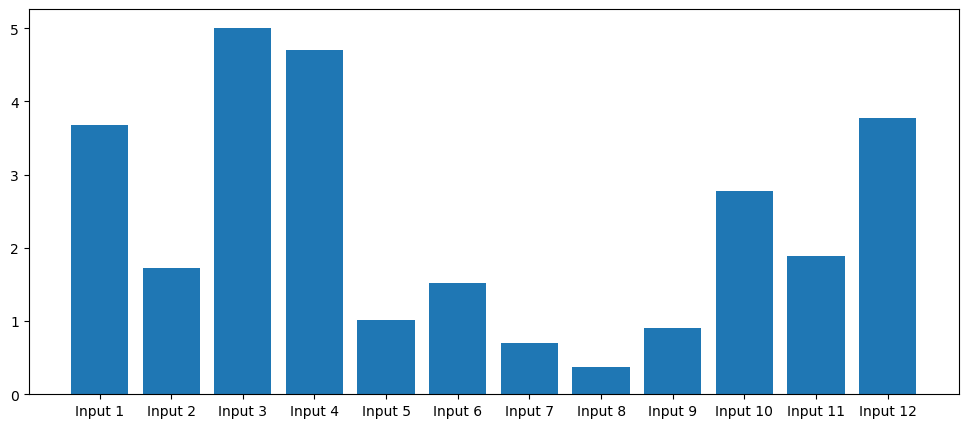

In [8]:
#get column names 
columns = df.columns.tolist()

#exclude last column(class)
features = len(columns)-1
columns = columns[:features]

#get and print the mean values for all sensors
print('The mean values are: \n{}'.format(df.mean(numeric_only=True)))

#store mean vlues
mean_values = df[:].mean(numeric_only=True)

#Plot
plt.figure(figsize=(12,5))
plt.bar(columns,mean_values)
plt.show()

<h3 style = "text-align: Left; color:green"> Data Preprocessing </h3>

### 7) TO DO: Create Feature Matrix and Target Vector

In [9]:
#defining the features
y = df['class']
X = df[['Input 1','Input 2','Input 3','Input 4','Input 5','Input 6','Input 7','Input 8','Input 9','Input 10','Input 11', 'Input 12']]

### 8) TO DO: Convert the features dataframe to a numpy array

In [10]:
y.to_numpy()
X.to_numpy()

array([[1.473, 2.311, 3.179, ..., 1.138, 1.111, 4.712],
       [1.46 , 2.377, 3.214, ..., 1.213, 1.027, 5.463],
       [1.552, 2.164, 3.064, ..., 1.221, 1.058, 5.332],
       ...,
       [3.64 , 1.284, 5.111, ..., 1.46 , 1.118, 4.867],
       [3.746, 1.261, 5.049, ..., 1.482, 1.128, 5.627],
       [3.959, 1.108, 5.422, ..., 1.595, 1.244, 5.623]])

### 9) TO DO: Label Encoding

In [11]:
#import label encoder 
from sklearn.preprocessing import LabelEncoder

#instantiate integer encoder
label_encoder = LabelEncoder()

#encode class labels
label_encoder.fit(y)

#print the categorical class labels we encoded
print(y)

0       one
1       one
2       one
3       one
4       one
       ... 
2059    two
2060    two
2061    two
2062    two
2063    two
Name: class, Length: 1826, dtype: object


### 10) TO DO: Split the data into Training and Testing Sets

Scikit learn contains a function called the **train_test_split** function that will randomly shuffle the dataset and then splits it into two datasets: a
**training set** used to build the model and a **test set** to assess and evaluate how well the model works on unseen data (also called outof=sample data).

### *Using 80%/20% split*

In [12]:
from sklearn.model_selection import train_test_split

#test_size= 0.20 means the test consists of 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state = 0)

### 11) TO DO: Look at the shape of the data (rows and columns) after splitting it into training and testing sets

In [13]:
#Displaying the dimensions of the training set
print('X train.shape: {}'.format(X_train.shape))
print('y train.shape: {}'.format(y_train.shape))
#Displaying the dimensions of the test set
print('X test.shape: {}'.format(X_test.shape))
print('y test.shape: {}'.format(y_test.shape))

X train.shape: (1460, 12)
y train.shape: (1460,)
X test.shape: (366, 12)
y test.shape: (366,)


<h3 style = "text-align: left; color:green"> Scale the Data </h3>
<h3 style = "text-align: left; color:red"> IMPORTANT: Standardizing the features:</h3>

Standardization of datasets (feature scaling) is a common requirement for many machine learning and optimization algorithms implemented in
scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data, i.e., Gaussian
with zero mean and unit variance

### 12) TO DO: Using the StandarScaler from Scikit-learn to transform (scale) our feature

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std =scaler.transform(X_test)

**A comment on what the above code does**

* Using the preceding code, we loaded the StandardScaler class from the preprocessing module and initialized a new StandardScaler objectthat we assigned to the variable sc.
* Using the fit method, StandardScaler estimated the parameters μ (sample mean) and (standard deviation) for each feature dimensionfrom the training data.
* By calling the transform method, we then standardized the training data using those estimated parameters μ and .
* Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other

<h3 style = "text-align: left; color:green"> Model Building </h3>

**Training multiple Machine Learning models during same session.** 
1. K-Nearest Neighbor (with K=10, K=50, K=200)
2. Logistic Regression
3. Linear Support Vector Classifier

<h3 style = "text-align: left; color:green"> Build a KNN Classification Model for K = 10, 50 and 200 </h3>

### 13) Build and train the actual machine learning model using a loop

In [15]:
from sklearn.neighbors import KNeighborsClassifier
numbers =[10,50,200]
knn_objects = []
#model selection process
for numb in numbers:
    knn = KNeighborsClassifier(n_neighbors=numb)
    knn.fit(X_train, y_train)
    knn_objects.append(knn)
    print("Model's acccuracy on Test set for K = {0} is :{1:0.2f}\n".format(numb,knn.score(X_test,y_test)))
#pick K-nearest neighbors




Model's acccuracy on Test set for K = 10 is :0.98

Model's acccuracy on Test set for K = 50 is :0.93

Model's acccuracy on Test set for K = 200 is :0.86



### Predicting class-membership probabilites

Scikit-Learn has a method that allows prediction of class member probabilities.

The probability that training examples belong to a certain class can be computed using the **predict_proba** method. For example, we canpredict the probabilities of the first three samples in the test set as follows (NOTE: X_test_std[:3. :] means get the first 3 rows and the associated columns from the test dataset X_test):

classifier.predict_proba(X_test_std[:3, :]) where classifier is either K-NN or Logistic Regression

In the cells below, your must predict the **class-membership probabilities** for each specified **SINGLE ROW OF DATA**

Also, you should recall that the label encoding that we implemented earlier resulted in the mapping:

**class membership label indices after encoding**
0 = 'one' (the Substance is Substance 1)
1 = 'three' (false alarm)
2 = 'two' (The Substance is Substance 2)

### ***************************************************14) TO DO:class-membership probability

Predict the class membership probability by using the a row with **index = 10** from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [16]:
print(f'The predicted membership probabibility of the 10th row is: {knn_objects[0].predict_proba(X_test_std[9,:].reshape(1, -1))}')
print(f'The actual class membership is: {y_test[10]}')


The predicted membership probabibility of the 10th row is: [[1. 0. 0.]]
The actual class membership is: one


/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 15) TO DO:class-membership probability

Predict the class membership probability by using the a row with **index = 125** from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [17]:
print(f'The predicted membership probabibility of the 125th row is: {knn_objects[1].predict_proba(X_test_std[124,:].reshape(1, -1))}')
#print(f'The actual class membership is: {y_test[124]}')

The predicted membership probabibility of the 125th row is: [[0.98 0.   0.02]]


/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 16) TO DO:class-membership probability

Predict the class membership probability by using the a row with **index = 200** from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [18]:
print(f'The predicted membership probabibility of the 200th row is: {knn_objects[2].predict_proba(X_test_std[199,:].reshape(1, -1))}')
#print(f'The actual class membership is: {y_test[200]}')

The predicted membership probabibility of the 200th row is: [[1. 0. 0.]]


/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<h2 style = "text-align: left; color:green"> Build Logistic Regresion Model </h2>

### 17) TO DO: scikit-learn Logistic Regression for this lab
**Import and instantiate the *Logistic Regression* Model in SciKit-Learn is in the cell below**

In [19]:
#instatiating the LinearRegression() mething
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'newton-cg',
                       multi_class = 'multinomial',
                       random_state=0)

### 18) TO DO: Train the model by calling the model's fit function

Now that the model has been instantiated (created) it still needs to be trained (fitted) to the training dataset.

In [20]:
#calling the model's fit function
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

### 19) TO DO: Evaluate the Logistic Regression Model
Use the test set to create the model's predictions. Name the prediction vector **y_pred** as in previous notebooks.

In [21]:
y_pred = lr.predict(X_test)
print("Test set prediction: \n {}".format(y_pred))

Test set prediction: 
 ['three' 'three' 'one' 'one' 'three' 'three' 'one' 'two' 'one' 'one' 'two'
 'two' 'two' 'one' 'three' 'one' 'two' 'one' 'three' 'two' 'three' 'one'
 'two' 'two' 'one' 'one' 'two' 'three' 'three' 'one' 'two' 'two' 'two'
 'one' 'two' 'two' 'one' 'one' 'two' 'two' 'one' 'three' 'one' 'three'
 'three' 'three' 'two' 'two' 'three' 'one' 'three' 'three' 'one' 'one'
 'three' 'one' 'two' 'two' 'one' 'one' 'one' 'two' 'one' 'one' 'two' 'two'
 'one' 'two' 'one' 'two' 'one' 'three' 'one' 'one' 'two' 'three' 'one'
 'one' 'two' 'three' 'three' 'one' 'three' 'two' 'two' 'one' 'two' 'two'
 'three' 'one' 'one' 'one' 'two' 'two' 'one' 'two' 'one' 'two' 'two' 'two'
 'one' 'three' 'one' 'two' 'one' 'two' 'two' 'one' 'three' 'two' 'two'
 'two' 'one' 'one' 'one' 'one' 'three' 'one' 'two' 'one' 'three' 'three'
 'one' 'one' 'two' 'two' 'two' 'three' 'two' 'one' 'one' 'three' 'one'
 'three' 'two' 'one' 'two' 'two' 'two' 'three' 'two' 'two' 'one' 'two'
 'two' 'two' 'two' 'two' 'one' 'one'

### 20) TO DO: Evaluate the Logistic Regression Model's Performance
Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy

In [22]:
print("Actual Values: \n {}".format(y_test))
print('Test accuracy: \n {0:0.2f}'.format(lr.score(X_test,y_test)))
misclassified = np.sum(y_test != y_pred)
print("Number of misclassified instances: \n {}".format(misclassified))

Actual Values: 
 894     three
889     three
132       one
357       one
1001    three
        ...  
422       one
815       two
1923      two
307       one
253       one
Name: class, Length: 366, dtype: object
Test accuracy: 
 0.98
Number of misclassified instances: 
 9


### Predicting class-membership probabilities using the Logistic Regression Model

### 21) TO DO:class-membership probability
Predict the class membership probability by using the a row with **index = 10** from the X_test_std data. Make sure your print statement uses a
complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [23]:
print('The predicted probablity for belonging to the class[class=0 class=1] are{0}'.format(lr.predict_proba(X_test[9,:])))


InvalidIndexError: (slice(None, 3, None), slice(None, None, None))

### 22) TO DO:class-membership probability
Predict the class membership probability by using the a row with **index = 130** from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [ ]:
print('The predicted probablity for belonging to the class[class=0 class=1] are{0}'.format(lr.predict_proba(X_test[129,:])))


### 23) TO DO:class-membership probability
Predict the class membership probability by using the a row with **index = 200** from the X_test_std data. Make sure your print statement uses a
complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [ ]:
print('The predicted probablity for belonging to the class[class=0 class=1] are{0}'.format(lr.predict_proba(X_test[199,:])))


<h2 style = "text-align: left; color:green"> Build Linear Support Vector Classifier Model </h2>

### 24) TO DO:scikit-learn Linear Support Vector Classifier for this lab

**Import and instantiate the Linear Support Vector Classifier Model in SciKit-Learn is in the cell below**

In [24]:
from sklearn.svm import LinearSVC
#instantiate the model and fit the data
lsvc=LinearSVC()

### 25) TO DO: Train the model by calling the model's fit function
Now that the model has been instantiated (created) it still needs to be trained (fitted) to the training dataset

In [25]:
lsvc.fit(X_train, y_train)

/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

### 26) TO DO: Evaluate the Linear Suport Vector Classifier Model
Use the test set to create the model's predictions. Name the prediction vector **y_pred** as in previous notebooks.

In [26]:
y_pred = lsvc.predict(X_test)
print("Test set prediction: \n {}".format(y_pred))

Test set prediction: 
 ['three' 'three' 'one' 'one' 'three' 'three' 'one' 'two' 'one' 'one' 'two'
 'two' 'two' 'one' 'three' 'one' 'two' 'one' 'three' 'two' 'three' 'one'
 'two' 'two' 'one' 'one' 'two' 'three' 'three' 'one' 'two' 'two' 'two'
 'one' 'two' 'one' 'one' 'one' 'two' 'two' 'one' 'three' 'one' 'three'
 'three' 'three' 'two' 'two' 'three' 'one' 'three' 'three' 'one' 'one'
 'three' 'one' 'two' 'two' 'one' 'one' 'one' 'two' 'one' 'one' 'two' 'two'
 'one' 'two' 'one' 'two' 'one' 'three' 'one' 'one' 'two' 'three' 'one'
 'one' 'two' 'three' 'three' 'one' 'three' 'two' 'two' 'one' 'two' 'two'
 'three' 'one' 'one' 'one' 'two' 'two' 'one' 'two' 'one' 'two' 'two' 'two'
 'one' 'three' 'one' 'two' 'one' 'two' 'two' 'one' 'three' 'two' 'two'
 'two' 'one' 'one' 'one' 'one' 'three' 'one' 'two' 'one' 'three' 'three'
 'one' 'one' 'two' 'two' 'two' 'three' 'two' 'one' 'one' 'three' 'one'
 'three' 'two' 'one' 'two' 'two' 'two' 'three' 'two' 'two' 'one' 'two'
 'two' 'two' 'two' 'two' 'one' 'one'

### 27) TO DO: Evaluate the Linear Suport Vector Model's Performance
Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy

In [27]:
# using the score method
print("Test set score: {0:0.2f}".format(lsvc.score(X_test,y_test)))

Test set score: 0.97


### 28) TO DO: Using the Predict Method of the Linear Suport Vector Model
Use SciKit Learn's built-in *predict method* to test the model's predictive performance for the first row of data in X_test_std

In [29]:
predicted_class = lsvc.predict(X_test_std[0].reshape(1, -1))
print(f"The predicted class for the first row of X_test_std is: {predicted_class[0]}")

The predicted class for the first row of X_test_std is: one


/Users/jordan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


### 29) TO DO:Print the number of misclassifications using numpy

<h2 style = "text-align: left; color:green"> Confusion Matrix </h2>

Supervised learner models are designed to classify, estimate, and/or predict future outcome. For some applications the desire is to build models showing consistently high predictive accuracy.

### Classification Correctness:

Classification correctness is best calculated by presenting previously unseen data in the form of a test set to the model being evaluated. Test
set model accuracy can be summarized in a table known as a confusion matrix. To illustrate, let’s suppose we have three possible classes: C1,
C2, and C3. A generic confusion matrix for the three class case is shown in Table 1.

* Values along the main diagonal give the total number of correct classifications for each class.
  * For example, a value of 15 for C11 means that 15 class C1 test set instances were correctly classified.
* Values other than those on the main diagonal represent classification errors.
    * To illustrate, suppose C12 has the value 4. This means that four class C1 instances were incorrectly classified as belonging to class C2. The following three rules may be helpful in analyzing the information in a confusion matrix:

### Rules for the Three-Class Confusion Matrix
* Rule 1. Values along the main diagonal represent correct classifications. For the matrix in Table 1,the value C11 represents the total number of class C1 instances correctly classified by the model. A similar statement can be made for the values C22 and C33.
* Rule 2. Values in row Ci represent those instances that belong to class Ci. For example, with i = 2,the instances associated with cells C21, C22, and C23 are all actually members of C2. To find the total number of C2 instances incorrectly classified as members of another class, we compute the sum of C21 and C23.
* Rule 3. Values found in column Ci indicate those instances that have been classified as members of Ci. With i = 2,the instances associated with cells C12, C22, and C32 have been classified as members of class C2.To find the total number of instances incorrectly classified as members of class C2, we compute the sum of C12 and C32

### 30) TO DO: Compute the Confusion Matrix for the Linear Suport Vector Model

Use SciKit Learn's metrics module to compute the model's confusion matrix.

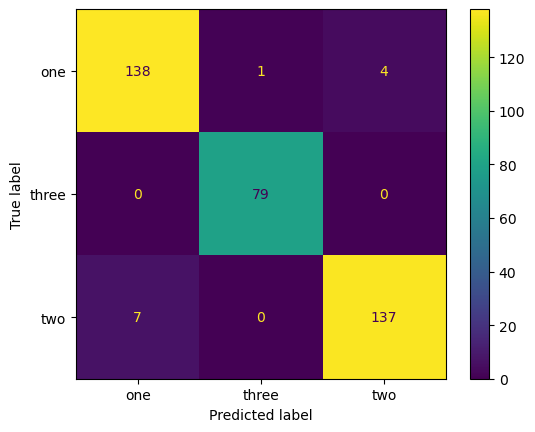

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lsvc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= lsvc.classes_)
disp.plot()
plt.show()

### 31)TO DO: Classification Correctness
Based on the output of your confusion matrix, what was the total number of correct classifications of Substance 2?

### Answer

The total number of correct classifications of substance 2 was 137.

### 32) TO DO: Compute the Classification report for Linear Suport Vector Model
Use SciKit Learn's metrics module to compute the model's classification report.

In [34]:
from sklearn import metrics
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred)

SyntaxError: incomplete input (877787960.py, line 3)

### 33) TO DO: Classification Report

Based on the output of your classification report, out of all the times Substance 1 should have been predicted, what percentage of times was
it correctly predicted?

Which performance score did you use to evaluate the performance of the model(s) from the confusion matrix /classification report? (HINT: You
may need to research the meaning and difference between precision, recall and f1-score)

<h2 style = "text-align: left; color:green"> Serialization </h2>

<h3 style = "text-align: left; color:purple"> 34) TO DO: Model Persistence - Save/Load the trained classifier  </h3>

To receive full credit for this part you must test the saved and re-loaded classifiers on an instance of “unknown” data and show that it correctly
classifies the instance. It’s ok if you use an instance (sample) that is from the test set as the “unknown” data.

<b style = "text-align: left; color:purple"> NOTE: Use either the Logistic Regression Model or the K-Nearest Neighbors Classifier for this part  </b>

### Step1: Save the model

**Pickle (serialize) and save the trained classifier to a folder**

In [31]:
#assign classifer to serialize 
saved_classifer = """Im guessing this is just a path name??? """
#serialization with Pickle
import pickle
import os

dest = os.path.join('classifer','pkl_objects')
if not os.path.exsits(dest):
    os.makedirs(dest)

pickle.dump(saved_classifer, open(os.path.join(dest, 'classifer.pkl'),'wb'), protocol=4)

SyntaxError: invalid syntax (1591777548.py, line 2)

### Step 2: Load the saved model

**Load the saved the trained classifier into memory**


In [ ]:
# load the saved data to the trained classifer into memory
import pickle
import re
import os
os.chdir('classifer')
classifer_reloaded = pickle.load(open(os.path.join('pkl_objects','classifer.pkl'), 'rb'))

### Step 3: Test the re-loaded model

Use SciKit Learn's built-in predict method to test the re-loaded model on data from the row of data in X_test_std with index equal to six (6)

### Summary

<h3 style = "text-align:left; color: red">BONUS (15 pts)</h3>

It is **your choice** to do the bonus or not. It can only add points to your total course grade. It wont't hurt your grade if you chose NOT to do it.
BUT, if you are going to attempt it, do it in the cells below (add cells as necessary). Follow the instructions for the notebook cells layout exactly
as indicated in the bonus document or you may not receive credit!

<h3 style = "text-align:center; color: red">End of Project</h3>
